## Centring vs Normalising vs Scaling
Lecturer: Dimitar Kazakov

* The scikit manual on `PCA` says:
Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space. The **input data is centred but not scaled** for each feature before applying the SVD."

* `sklearn.preprocessing.normalize`: **Scale** input vectors individually **to unit norm** (vector length).

* `sklearn.preprocessing.scale`: **Center to the mean** and component wise **scale to unit variance** (i.e. it *standardises* the data).

### Original data:

```
              Feature 1.  Feature 2. Feature 3.   
Observation 1.    1           2         3
Observation 2     4           5         6
Observation 3     7           8         9

```
```
Obs1.Feat1.normalised = 1 / sqrt(1*1 + 4*4 + 7*7), etc.
```

### Normalised data:
```
              Feature 1.  Feature 2. Feature 3.   
Observation 1.    0.123     0.207      0.267
Observation 2     0.492     0.518      0.535
Observation 3     0.862     0.830      0.802

```

```
Then 0.123*0.123 + 0.492*0.492 + 0.862*0.862 ≈ 1
```

From: https://stats.stackexchange.com/questions/385775/normalizing-vs-scaling-before-pca

Author: https://stats.stackexchange.com/users/82893/john-madden

Scaling is important because SVD approximates in the sum of squares sense, so if one variable is on a different scale than another, it will dominate the PCA procedure, and the low D[imensionality] plot will really just be visualizing that dimension.

I will illustrate with an example in python.

Let's first set up an environment:


In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale, normalize
import matplotlib.pyplot as plt
#turn on interactive mode
plt.ion()

# For reproducibility
np.random.seed(123)

We're going to generate data that are standard normal/uncorrelated in 5 dimensions, but with one additional variable that takes value either 0 or 3 randomly, giving a 6 dimensional dataset that we wish to visualize:

In [ ]:
N = 200
P = 5

X = np.random.normal(size=[N,P])
X = np.append(X, 3*np.random.choice(2, size = [N,1]), axis = 1)
X

array([[-1.0856306 ,  0.99734545,  0.2829785 , -1.50629471, -0.57860025,
         0.        ],
       [ 1.65143654, -2.42667924, -0.42891263,  1.26593626, -0.8667404 ,
         3.        ],
       [-0.67888615, -0.09470897,  1.49138963, -0.638902  , -0.44398196,
         0.        ],
       ...,
       [-1.77524284, -1.18465749,  0.14597923, -1.78652685, -0.1523945 ,
         3.        ],
       [-0.45356918,  0.9992528 , -1.31804382, -1.93176898, -0.41964074,
         0.        ],
       [ 0.63476313,  1.0699186 , -0.90932702,  0.47026375, -1.11143045,
         0.        ]])

We will first do PCA without any preprocessing:



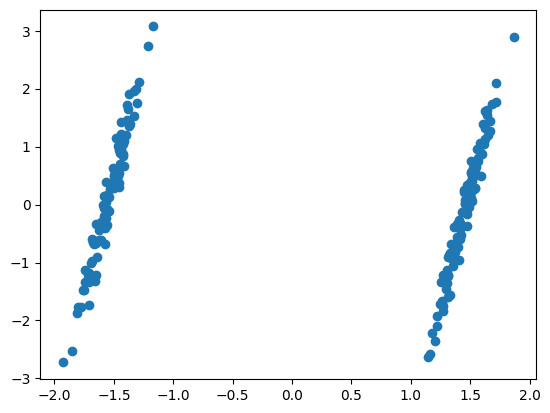

In [ ]:
# No preprocessing:
pca = PCA(2)
low_d = pca.fit_transform(X)
plt.scatter(low_d[:,0], low_d[:,1])

We clearly see two clusters, but the data were generated completely at random with no structure at all!

Normalizing changes the plot, but we still see 2 clusters:

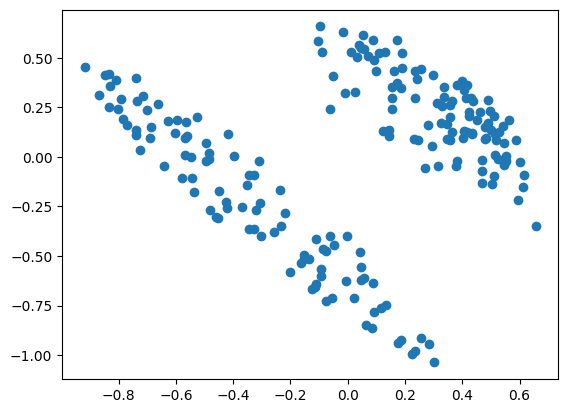

In [ ]:
# normalize
Xn = normalize(X)
pca = PCA(2)
low_d = pca.fit_transform(Xn)
plt.scatter(low_d[:,0], low_d[:,1])

The fact that the binary variable was on a different scale from the others has created a clustering effect where one might not necessarily exist. This is because the SVD considers it more than other variables as it contributes more to squared error. This may be solved by scaling the dataset:


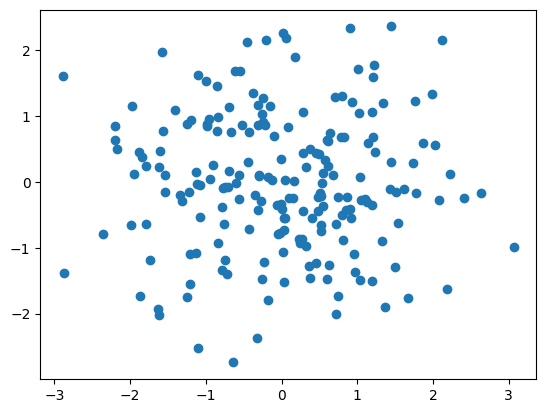

In [ ]:
# Scale
Xs = scale(X)
low_d = pca.fit_transform(Xs)
plt.scatter(low_d[:,0], low_d[:,1])

We finally see (correctly) that the data are completely random noise.


### Scaled data:
```
              Feature 1.  Feature 2. Feature 3.   
Observation 1.    -1.225     -1.225     -1.225
Observation 2      0.0        0.0        0.0
Observation 3     +1.225     +1.225     +1.225

```

```
Then for each feature the variance is 1:
(-1.225 * -1.225) + (0 * 0)  + (1.225 * 1.225) ≈ 1
```